#**PREPROCESAMIENTO ADICIONAL DATASET ISBI 2015 - CROPPING Y PADDING**

In [ ]:
import nibabel as nib
import os
import numpy as np

In [ ]:
# Ruta de la carpeta de imagenes
main_folder = #

# Función para calcular la región de interes
def has_bounding_box(slice_img, threshold=10):
    mask = slice_img > threshold
    return np.any(mask)
# Función para eliminar voxeles sin bounding box en todos los planos
def remove_black_vox(img_data, threshold=10):
    # Axiales
    axial_slices = [img_data[:, :, i] for i in range(img_data.shape[2])]
    axial_slices_with_bbox = [i for i, slice_img in enumerate(axial_slices) if has_bounding_box(slice_img, threshold)]
    # Sagitales
    sagittal_slices = [img_data[i, :, :] for i in range(img_data.shape[0])]
    sagittal_slices_with_bbox = [i for i, slice_img in enumerate(sagittal_slices) if has_bounding_box(slice_img, threshold)]
    # Coronales
    coronal_slices = [img_data[:, i, :] for i in range(img_data.shape[1])]
    coronal_slices_with_bbox = [i for i, slice_img in enumerate(coronal_slices) if has_bounding_box(slice_img, threshold)]
    # Define rango entre los cortes
    min_axial, max_axial = min(axial_slices_with_bbox), max(axial_slices_with_bbox)
    min_sagittal, max_sagittal = min(sagittal_slices_with_bbox), max(sagittal_slices_with_bbox)
    min_coronal, max_coronal = min(coronal_slices_with_bbox), max(coronal_slices_with_bbox)
    # Recorta la imagen
    cropped_img_data = img_data[min_sagittal:max_sagittal + 1, min_coronal:max_coronal + 1, min_axial:max_axial + 1]
    return cropped_img_data

# Función para aplicar padding
def apply_padding(cropped_img_data, cropped_img_affine, cropped_img_header, target_shape=(192, 192, 192)):
    cropped_shape = cropped_img_data.shape
    padding = [(int(np.floor((target - current) / 2)), int(np.ceil((target - current) / 2)))
               for target, current in zip(target_shape, cropped_shape)]
    padded_img_data = np.pad(cropped_img_data, padding, mode='constant', constant_values=0)
    padded_img = nib.Nifti1Image(padded_img_data, cropped_img_affine, cropped_img_header)
    return padded_img

# Procesar cada archivo NIfTI en la carpeta
for folder in os.listdir(main_folder):
    folder_path = os.path.join(main_folder, folder)
    if os.path.isdir(folder_path):
        preprocessed_folder = os.path.join(folder_path, 'preprocessed')
        if os.path.isdir(preprocessed_folder):
            for file in os.listdir(preprocessed_folder):
                if file.endswith('.nii'):
                    file_path = os.path.join(preprocessed_folder, file)
                    img = nib.load(file_path)
                    img_data = img.get_fdata()
                    # Cropping
                    cropped_img_data = remove_black_vox(img_data, threshold=10)
                    cropped_img = nib.Nifti1Image(cropped_img_data, img.affine, img.header)
                    cropped_output_path = os.path.join(preprocessed_folder, file.replace('.nii', '_cropped.nii'))
                    nib.save(cropped_img, cropped_output_path)
                    print(f'Cropped image saved to: {cropped_output_path}')
                    # Padding
                    padded_img = apply_padding(cropped_img_data, img.affine, img.header)
                    padded_output_path = os.path.join(preprocessed_folder, file.replace('.nii', '_padded.nii'))
                    nib.save(padded_img, padded_output_path)
                    print(f'Padded image saved to: {padded_output_path}')

print('Processing complete.')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Cropped image saved to: /content/drive/MyDrive/TESTING_UNET/test_ISBI_2015/test01/preprocessed/test01_01_flair_pp_cropped.nii
Padded image saved to: /content/drive/MyDrive/TESTING_UNET/test_ISBI_2015/test01/preprocessed/test01_01_flair_pp_padded.nii
Cropped image saved to: /content/drive/MyDrive/TESTING_UNET/test_ISBI_2015/test01/preprocessed/test01_03_flair_pp_cropped.nii
Padded image saved to: /content/drive/MyDrive/TESTING_UNET/test_ISBI_2015/test01/preprocessed/test01_03_flair_pp_padded.nii
Cropped image saved to: /content/drive/MyDrive/TESTING_UNET/test_ISBI_2015/test01/preprocessed/test01_02_flair_pp_cropped.nii
Padded image saved to: /content/drive/MyDrive/TESTING_UNET/test_ISBI_2015/test01/preprocessed/test01_02_flair_pp_padded.nii
Cropped image saved to: /content/drive/MyDrive/TESTING_UNET/test_ISBI_2015/test01/preprocessed/test01_04_flair_pp_cropped

In [ ]:
# Ruta de la carpeta principal
main_folder = #

# Buscar y mostrar dimensiones de imágenes originales, _cropped y _padded
for folder in os.listdir(main_folder):
    folder_path = os.path.join(main_folder, folder)
    if os.path.isdir(folder_path):
        preprocessed_folder = os.path.join(folder_path, 'preprocessed')
        if os.path.isdir(preprocessed_folder):
            for file in os.listdir(preprocessed_folder):
                if file.endswith(('.nii', '_cropped.nii', '_padded.nii')):
                    file_path = os.path.join(preprocessed_folder, file)
                    img = nib.load(file_path)
                    img_data = img.get_fdata()
                    print(f'Dimensiones de {file}: {img_data.shape}')

print('Proceso completado.')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Dimensiones de test01_01_flair_pp.nii: (181, 217, 181)
Dimensiones de test01_03_flair_pp.nii: (181, 217, 181)
Dimensiones de test01_02_flair_pp.nii: (181, 217, 181)
Dimensiones de test01_04_flair_pp.nii: (181, 217, 181)
Dimensiones de test01_01_flair_pp_cropped.nii: (129, 174, 132)
Dimensiones de test01_01_flair_pp_padded.nii: (192, 192, 192)
Dimensiones de test01_03_flair_pp_cropped.nii: (129, 174, 132)
Dimensiones de test01_03_flair_pp_padded.nii: (192, 192, 192)
Dimensiones de test01_02_flair_pp_cropped.nii: (129, 174, 132)
Dimensiones de test01_02_flair_pp_padded.nii: (192, 192, 192)
Dimensiones de test01_04_flair_pp_cropped.nii: (129, 174, 132)
Dimensiones de test01_04_flair_pp_padded.nii: (192, 192, 192)
Dimensiones de test02_01_flair_pp.nii: (181, 217, 181)
Dimensiones de test02_03_flair_pp.nii: (181, 217, 181)
Dimensiones de test02_02_flair_pp.nii: (1

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


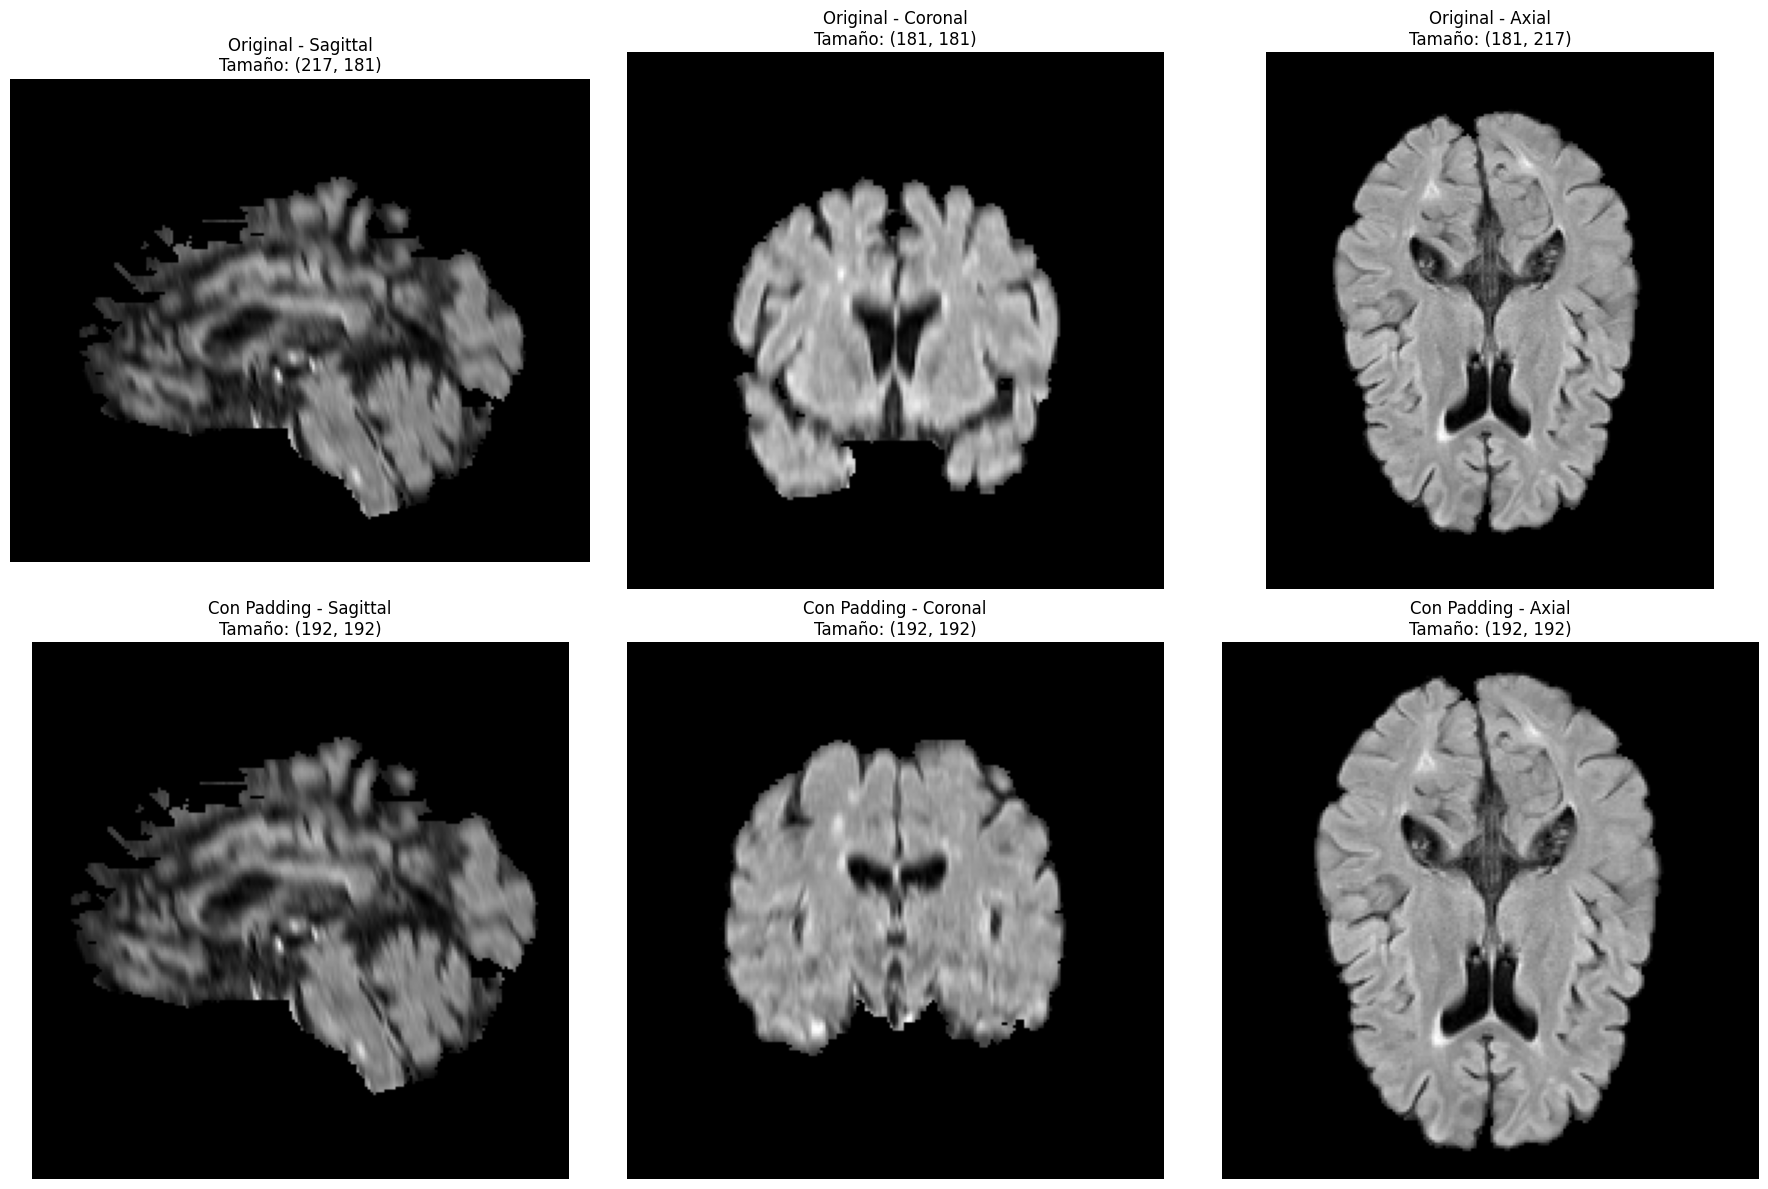

In [ ]:
# Definir los títulos para las vistas
titles = ['Sagittal', 'Coronal', 'Axial']

# Mostrar la comparación
show_comparative_slices(
    original_slices=[original_slice_sagittal, original_slice_coronal, original_slice_axial],
    padded_slices=[padded_slice_sagittal, padded_slice_coronal, padded_slice_axial],
    titles=titles)